In [1]:
!mkdir data
%cd data

!gdown 1FdydikIZfRaENz3CLaZT24Deyc4KvZO3

%cd ..

d:\AIVietNam\2024\aio-2024-hw\module-4\05_10_2024_M04W02\data


A subdirectory or file data already exists.


d:\AIVietNam\2024\aio-2024-hw\module-4\05_10_2024_M04W02


Downloading...
From: https://drive.google.com/uc?id=1FdydikIZfRaENz3CLaZT24Deyc4KvZO3
To: d:\AIVietNam\2024\aio-2024-hw\module-4\05_10_2024_M04W02\data\advertising.csv

  0%|          | 0.00/4.06k [00:00<?, ?B/s]
100%|██████████| 4.06k/4.06k [00:00<?, ?B/s]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('./data/advertising.csv', delimiter=',', skip_header=1)
N = data.shape[0]
X = data[:, :3]
y = data[:, 3:]


In [3]:
def mean_norm(X):
    print("len(X): ", len(X))
    print("X.shape: ", X.shape)
    N = len(X)
    maxi = np.max(X, axis=0) # axis = 0: column, axis = 1: row
    mini = np.min(X, axis=0)
    avg = np.mean(X, axis=0)
    X = (X - avg) / (maxi - mini)
    X_b = np.c_[np.ones((N, 1)), X]
    return X_b, maxi, mini, avg

X_b, maxi, mini, avg = mean_norm(X)
print(f"X_b: {X_b}")
print(f"maxi: {maxi}")
print(f"mini: {mini}")
print(f"avg: {avg}")


len(X):  200
X.shape:  (200, 3)
X_b: [[ 1.00000000e+00  2.80884342e-01  2.93064516e-01  3.39894459e-01]
 [ 1.00000000e+00 -3.46778830e-01  3.23306452e-01  1.27933157e-01]
 [ 1.00000000e+00 -4.39102131e-01  4.56370968e-01  3.40773967e-01]
 [ 1.00000000e+00  1.50743997e-02  3.63629032e-01  2.45787159e-01]
 [ 1.00000000e+00  1.14161312e-01 -2.51290323e-01  2.44907652e-01]
 [ 1.00000000e+00 -4.67847481e-01  5.16854839e-01  3.90905893e-01]
 [ 1.00000000e+00 -3.02815353e-01  1.92258065e-01 -6.20404573e-02]
 [ 1.00000000e+00 -9.07761245e-02 -7.38709677e-02 -1.66701847e-01]
 [ 1.00000000e+00 -4.68185661e-01 -4.26693548e-01 -2.59929639e-01]
 [ 1.00000000e+00  1.78415624e-01 -4.16612903e-01 -8.22691293e-02]
 [ 1.00000000e+00 -2.73731823e-01 -3.52096774e-01 -5.58839050e-02]
 [ 1.00000000e+00  2.28804532e-01  1.48387097e-02 -2.33544415e-01]
 [ 1.00000000e+00 -4.16782212e-01  2.38629032e-01  3.10870712e-01]
 [ 1.00000000e+00 -1.67543118e-01 -3.15806452e-01 -2.05400176e-01]
 [ 1.00000000e+00  1.9295

Epoch 0 of 50
Loss li: [[138.17929252]]
Gradient li: [[-16.62403636]]
Gradients: [[-16.62403636]
 [ -5.21475838]
 [  6.42304502]
 [ -0.92784639]]
Thetas: [[ 0.52983384]
 [-0.90869145]
 [-1.61543768]
 [ 0.26785832]]
Loss: 138.17929252309636
----------------------------------------------------------------------------------------------------
Loss li: [[128.03152053]]
Gradient li: [[-16.00196991]]
Gradients: [[-16.00196991]
 [ -7.0164877 ]
 [  6.76341325]
 [  0.96462183]]
Thetas: [[ 0.68985354]
 [-0.83852657]
 [-1.68307181]
 [ 0.2582121 ]]
Loss: 128.0315205328543
----------------------------------------------------------------------------------------------------
Loss li: [[79.2307392]]
Gradient li: [[-12.58814833]]
Gradients: [[-12.58814833]
 [  2.24954085]
 [  4.6606604 ]
 [  2.48596555]]
Thetas: [[ 0.81573502]
 [-0.86102198]
 [-1.72967841]
 [ 0.23335244]]
Loss: 79.23073920116639
----------------------------------------------------------------------------------------------------
Loss li: 

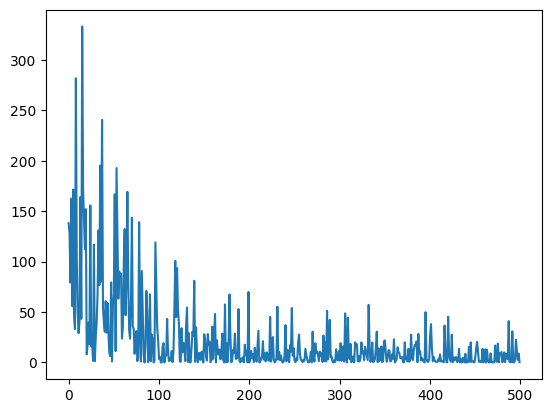

In [4]:
def stochastic_gradient_descent(X_b, y, n_epochs=50, lr=0.00001):
    # thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
    num_features = X_b.shape[1]
    thetas = np.random.randn(num_features, 1)
    thetas_path = [thetas]
    losses = []
    
    for epoch in range(n_epochs):
        print(f"Epoch {epoch} of {n_epochs}")
        for i in range(N):
            random_index = np.random.randint(N)
            
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]

            # Compute output
            oi = xi.dot(thetas)
            
            # Compute loss li
            li = (oi - yi) ** 2 / 2
            
            # Compute gradient for loss
            g_li = (oi - yi)
            
            # Compute gradient descent
            gradients = xi.T.dot(g_li)

            # Update theta
            thetas = thetas - lr*gradients
            
            thetas_path.append(thetas)
            losses.append(li[0][0])

            print(f"Loss li: {li}")
            print(f"Gradient li: {g_li}")
            print(f"Gradients: {gradients}")
            print(f"Thetas: {thetas}")
            print(f"Loss: {losses[-1]}")
            print('-'*100)
    return thetas_path, losses

sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=50, lr=0.01)

x_axis = list(range(500))
plt.plot(x_axis, losses[:500])
plt.show()




Epoch 0 of 50
Batch 0 of 10
Loss: [[  7.90920798]
 [118.76328415]
 [ 17.39007542]
 [197.59414944]
 [108.05036958]
 [131.97109074]
 [240.29966466]
 [ 39.65012296]
 [174.70444538]
 [ 48.12470033]
 [ 29.8032885 ]
 [  3.85421486]
 [105.34674996]
 [117.82786233]
 [ 47.10943622]
 [ 32.8327273 ]
 [129.03087229]
 [244.54792835]
 [ 29.10584228]
 [200.11812828]]
Loss grad: [[-0.19886186]
 [-0.77059485]
 [-0.29487349]
 [-0.99396718]
 [-0.73501826]
 [-0.81231487]
 [-1.09612879]
 [-0.44525343]
 [-0.93462411]
 [-0.49053389]
 [-0.38602648]
 [-0.1388203 ]
 [-0.72576425]
 [-0.76755411]
 [-0.48533203]
 [-0.40517112]
 [-0.80321502]
 [-1.10577558]
 [-0.38148291]
 [-1.00029528]]
Gradients: [[-12.97160781]
 [ -1.1336732 ]
 [ -0.79197874]
 [ -0.28674662]]
Thetas: [[ 1.47963934]
 [-0.55391227]
 [-1.99776935]
 [ 0.1618409 ]]
Loss mean: 10.120170805077308
----------------------------------------------------------------------------------------------------
Batch 1 of 10
Loss: [[129.17285939]
 [ 94.96173238]
 [103

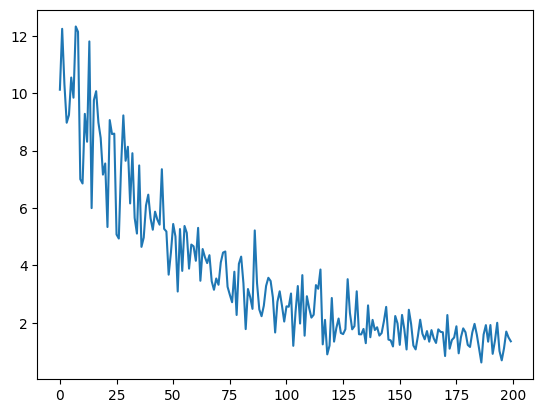

In [5]:
def mini_batch_gradient_descent(X_b, y, n_epochs=100, batch_size=10, lr=0.01):
    num_features = X_b.shape[1]
    thetas = np.random.randn(num_features, 1)
    
    thetas_path = [thetas]
    losses = []
    
    for epoch in range(n_epochs):
        print(f"Epoch {epoch} of {n_epochs}")
        shuffled_indices = np.random.permutation(N)
        
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        
        for i in range(0, N, batch_size):
            print(f"Batch {i // batch_size} of {N // batch_size}")
            xi = X_b_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            
            output = xi.dot(thetas)
            loss = ((output - yi) ** 2) / 2
            
            loss_grad = (output - yi) / batch_size
            gradients = xi.T.dot(loss_grad)
            
            thetas = thetas - lr * gradients
            thetas_path.append(thetas)
            
            loss_mean = np.sum(loss) / N
            losses.append(loss_mean)
            
            print(f"Loss: {loss}")
            print(f"Loss grad: {loss_grad}")
            print(f"Gradients: {gradients}")
            print(f"Thetas: {thetas}")
            print(f"Loss mean: {losses[-1]}")
            print('-'*100)
    return thetas_path, losses

mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50, batch_size=20, lr=0.01)

x_axis = list(range(200))
plt.plot(x_axis, losses[:200])
plt.show()

    


Epoch 0 of 100
Gradients: [[-27.68972146]
 [ -2.83332244]
 [ -1.17136568]
 [ -0.33284765]]
Thetas: [[ 1.56253649]
 [-0.44064415]
 [-0.37281609]
 [ 0.05500002]]
Loss: 221.18959638692672
----------------------------------------------------------------------------------------------------
Epoch 1 of 100
Gradients: [[-27.13592703]
 [ -2.82843751]
 [ -1.16887406]
 [ -0.33195375]]
Thetas: [[ 1.83389576]
 [-0.41235977]
 [-0.36112735]
 [ 0.05831956]]
Loss: 213.50404098269755
----------------------------------------------------------------------------------------------------
Epoch 2 of 100
Gradients: [[-26.59320849]
 [ -2.82356108]
 [ -1.16638771]
 [ -0.33106181]]
Thetas: [[ 2.09982784]
 [-0.38412416]
 [-0.34946348]
 [ 0.06163018]]
Loss: 206.11941126838843
----------------------------------------------------------------------------------------------------
Epoch 3 of 100
Gradients: [[-26.06134432]
 [ -2.81869311]
 [ -1.16390662]
 [ -0.33017183]]
Thetas: [[ 2.36044128]
 [-0.35593723]
 [-0.33782441

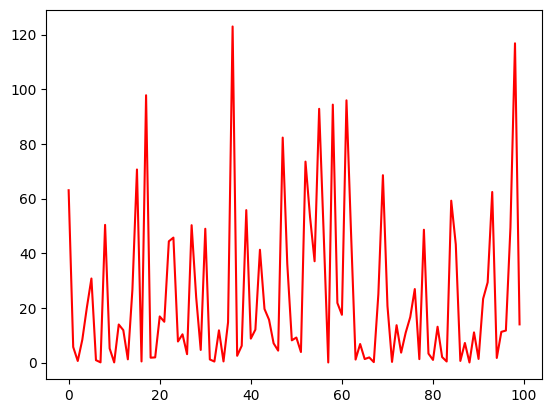

In [6]:
def bactch_gradient_descent(X_b, y, n_epochs=100, lr=0.01):
    num_features = X_b.shape[1]
    thetas = np.random.randn(num_features, 1)
    
    thetas_path = [thetas]
    losses = []
    
    for i in range(n_epochs):
        print(f"Epoch {i} of {n_epochs}")
        output = X_b.dot(thetas)
        loss = (output - y) ** 2
        
        # Đạo hàm cho loss
        loss_grad = 2 * (output - y) / N
        
        # Đạo hàm cho các tham số
        gradients = X_b.T.dot(loss_grad)
        
        thetas = thetas - lr * gradients
        thetas_path.append(thetas)
        
        mean_loss = np.sum(loss) / N
        losses.append(mean_loss)
        
        print(f"Gradients: {gradients}")
        print(f"Thetas: {thetas}")
        print(f"Loss: {losses[-1]}")
        print('-'*100)
    
    return thetas_path, loss

bgd_thetas, losses = bactch_gradient_descent(X_b, y, n_epochs=100, lr=0.01)

x_axis = list(range(100))
plt.plot(x_axis, losses[:100], color='r')
plt.show()




